# Task 4 Business Analytics

- You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.shape #Dimensions of the data

(9994, 13)

In [4]:
data.info() #Information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [5]:
data.isnull().sum() #Checking for null/missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.duplicated().sum() #Checking for duplicate values

17

In [7]:
data.drop_duplicates(keep='first',inplace=True) #Dropping all the duplicate values

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop(['Postal Code','Country'],axis=1,inplace=True) #Dropping the columns 'Postal Code' and 'Country'

In [10]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
data.nunique() #Unique occurrences

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
data.describe() #Statistical information of the data

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


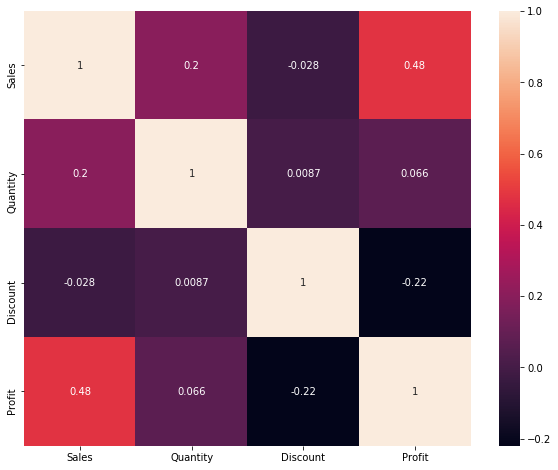

In [13]:
#Correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

- Sales and Profit have weak positive correlation (48%),which indicates that as Sales increases Profit also increases
- Quantity and Profit have very weak positive correlation (6.6%)
- Discount and Profit have weak negative correlation (22%),which indicates that as Discount increases Profit decreases

# Data Visualisation

In [14]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [15]:
#Ship Mode
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

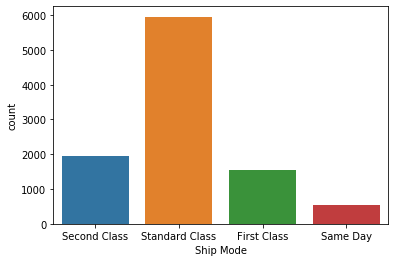

In [16]:
sns.countplot(data['Ship Mode'])

- From the above graph,we can see that the Ship mode is maximum for 'Standard Class' and minimum for 'Same Day'

In [17]:
#Segment
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

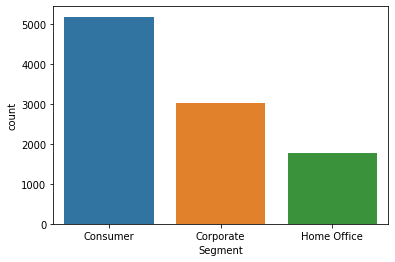

In [18]:
sns.countplot(data['Segment'])

- We can see that maximum Segment is of 'Consumer' and minimum is of 'Home Office'

In [19]:
#Region
data['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

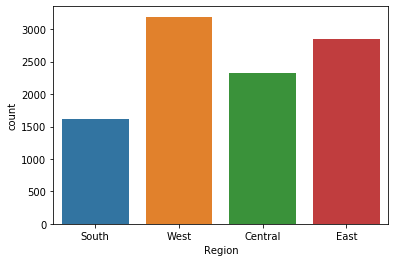

In [20]:
sns.countplot(data['Region'])

- We can see that the maximum entries are from 'West' and 'East' Region of the United States

In [21]:
#State
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

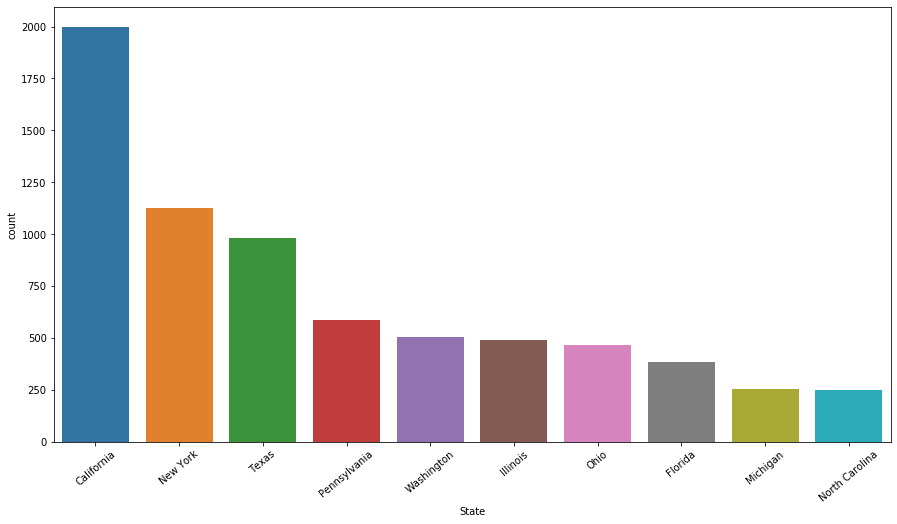

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data['State'],order=(data['State'].value_counts().head(10)).index)
plt.xticks(rotation=40)

- Maximum number of people are from 'California'

Text(-2.450000000000003, 0.5, 'Quantities ordered')

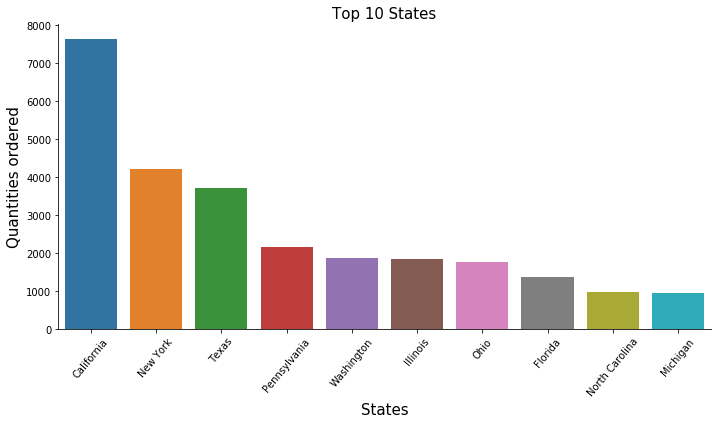

In [23]:
#Top 10 states based on the quantity ordered
top = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x ='State', y ='Quantity', data = top.head(10), kind ='bar', aspect = 2)
plt.title('Top 10 States', fontsize = 15)
plt.xticks(rotation = 50)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15)

- We can see that maximum orders are from the states 'California'

In [24]:
#Category
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

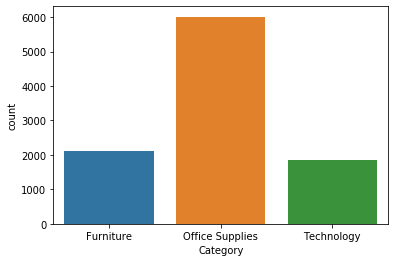

In [25]:
sns.countplot(data['Category'])

- Major Category is from 'Office Supplies'

In [26]:
# Sub-Category
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

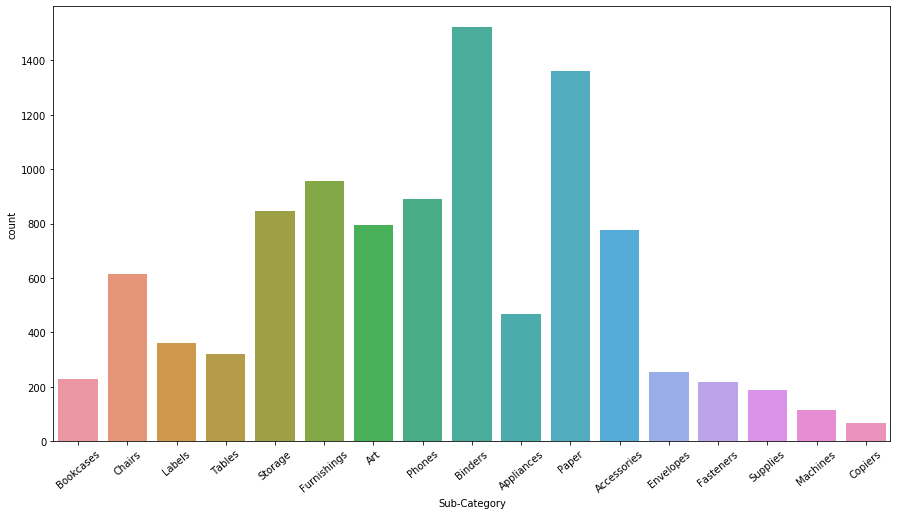

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=40)

- We can see that maximum is 'Binders' and least is 'Copiers'

Text(0.5, 6.79999999999999, 'Products')

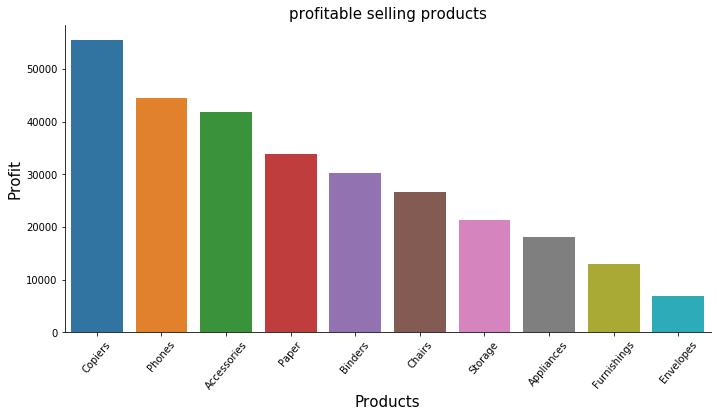

In [28]:
#Top 10 Profitable selling products
top = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
sns.catplot(x = 'Sub-Category', y = 'Profit', data = top.head(10), kind = 'bar',aspect=2)
plt.title('profitable selling products', fontsize = 15)
plt.xticks(rotation = 50)
plt.ylabel('Profit', fontsize = 15)
plt.xlabel('Products', fontsize = 15)

- We can see that the maximum profit is earned from the Products 'Copiers','Phones' and 'Accessories'

# Conclusion

- Shipping mode is maximum for Standard Class and improvements have to be done for Same day
- Office supplies is the major category that is shipped
- Maximum number of people are from California and New York.California has the highest quantity orders which in turn has the highest sales and profit 
- West and East have the highest orders and to increase the sales and profit,business should expand in other regions as well
- Maximum segment is of Consumers,has the highest purchases which increases the sales and profit
- The most profitable products are Copiers,Phones and Accessories
- Sales and Profit have weak positive correlation (48%),which indicates that as Sales increases Profit also increases
- Discount and Profit have weak negative correlation (22%),which indicates that as Discount increases Profit decreases 